# <span style='color:Black'> MARKET BASKET ANALYSIS USING APRIORI ALGORITHM

All of us have done e-shopping right? We go to the site for buying a particular thing and come out with a lot more than what we wished to buy, right? Ever thought how the retailers manage to tempT us into buying stuff that we actually did not intend to buy in the first place?


We live in the era of e-commerce and digital marketing, We hav even small scale businesses going online as the opportunities are endless.
Since a huge chunk of the people who have access to internet is switching to onlline shopping, large retailers are actively searching for ways to increase their profit.

Market Basket analysis is one such key techniques used by large retailers to uncover relationships between items, which can in turn help them make profit:

For example:

Customers who buy bread are more likely to buy jam as well, similarly people who buy laptops are likely to buy laptop bags as well. Finding these kind of relationships between items and ensuring that they are placed correctly in the market recommendations so that the chance of the purchase of the second item is effectively increased.

Now lets say we find out that people who buy bread buy jam most of the time, how can we make them buy a third item say eggs? what if we place an offer that they can't deny?
Lets give them a discount of 30% on eggs, they will be tempted to buy the eggs right?

This is how the market basket analysis work, we find relationships between items so that the retailers can make necessary arrangements and offers to ensure that the person who is buying one item buys the related items as well.


**Steps for apriori algorithm

Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).

Extract all the subsets having higher value of support than minimum threshold.

Select all the rules from the subsets with confidence value higher than minimum threshold.

Order the rules by descending order of Lift.

# APRIORI

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import apyori
from apyori import apriori

In [3]:
data = pd.read_csv("Groceries_dataset.csv")
data.shape

(38765, 3)

In [4]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


The above dataset is that of a grocery store, we can see that the dataset has three columns the member_number (The is of the person who bought the item), Date of purchase and the description of the item.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


We can see that there are 38765 rows in the dataset

In [6]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

We can see that there are no null values in any of the columns in the dataset, this makes analysis easier.

### <span style='color:Black'> Now let's look at the top selling products as well as the least selling products in the dataset.

In [7]:
#Let's split up this line of code, we first count the occurances of each item in the dataset, then sort the value in asending order and filter out the first 10 items, this would be the top 10 selling items
x = data['itemDescription'].value_counts().sort_values(ascending=False)[:10]

<Axes: xlabel='itemDescription'>

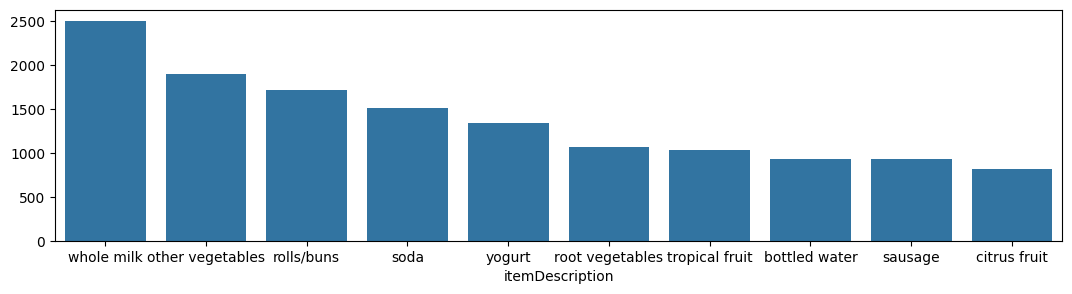

In [8]:
plt.figure(figsize=(13, 3))
sns.barplot(x = x.index,y = x.values)

 We can see that whole milk has the highest count (nearly 2500), followed by vegetables(almost 1800)

In [9]:
#Now let's look at the 10 least selling products
#The only change in code would be to not sort the values in descending order

y = data['itemDescription'].value_counts().sort_values(ascending=True)[:10]

<Axes: xlabel='itemDescription'>

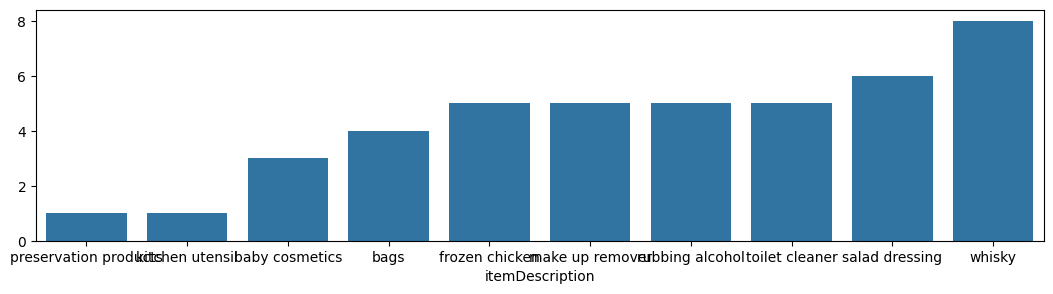

In [10]:
plt.figure(figsize=(13, 3))
sns.barplot(x = y.index,y = y.values)

We can see that preservation products are the least sold item followed by kitchen utensils.

Let's create a dataframe by counting the number of times each customer has made a purchase. Then sort that in descending order and filter out the first 10 values, these are the ids of the customers that has made the most purchases.

In [11]:
pd.DataFrame(data['Member_number'].value_counts().sort_values(ascending=False))[:10]

,count
Member_number,
3180,36
3050,33
2051,33
3737,33
2625,31
3915,31
2433,31
2271,31
3872,30


We can see that customer with id 3180 has made the most purchases (36) followed by 3050,2051,3737 buying 33 items each.

### <span style='color:Black'>Let's find the dates on which highest sale was made.

In [12]:
#Let's create few new column by modifying the date column in the dataframe

#Filtering out the year value from the date by splitting the date on - which gives a list and then taking out the last value which is the year value
data["Year"] = data['Date'].str.split("-").str[-1]

#Creating a new column in Month-Year format by splitting the date by - and filtering out the second and last value from the list which belongs to month and year respectively
data["Month-Year"] = data['Date'].str.split("-").str[1] + "-" + data['Date'].str.split("-").str[-1]

In [13]:
#Plotting a bar graph with number of sales in each  month of each year
fig1 = px.bar(data["Month-Year"].value_counts(ascending=False),
              orientation= "v",
              color = data["Month-Year"].value_counts(ascending=False),

               labels={'value':'Count', 'index':'Date','color':'Meter'})

fig1.update_layout(title_text="Exploring highest sales by  date")

fig1.show()

We can see that most of the sales is during the months of August and september and the least sales take place in February and March.

Implementation of Apriori Algorithm

Creating a list of names of unique products present in the itemDescription column

In [14]:
products = data['itemDescription'].unique()

In [15]:
len(products)

167

In [16]:
products[:10]

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken'], dtype=object)

### One hot encoding

In [17]:
#For modelling and finding the relationship between products we need to be working with numerical values, so let's one hot encode the products
data1=data.copy()
one_hot = pd.get_dummies(data1['itemDescription'])
data1.drop(['itemDescription'], inplace =True, axis=1)

data1 = data1.join(one_hot)

data1.head()

,Member_number,Date,Year,Month-Year,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,07-2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,2015,01-2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,2015,09-2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,2015,12-2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,2015,02-2015,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#Group the data based on Member_number and then by date and computing the sum by products using the products in the earlier created project list.

In [18]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

data2.head(3)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  

[3 rows x 167 columns]

In [19]:
#Reset the index of the newly formed dataset.
data2 = data2.reset_index()[products]
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a function product_names which takes some data and for each product in the data, if the value of that product in the data is more than zero, then replace the value with the product name from the product list.

In [20]:
def product_names(x):
    for product in products:
        if x[product] >0:
            x[product] = product
    return x
#Apply the created function on data2 dataset.
data2 = data2.apply(product_names, axis=1)
data2.head()

C:\Users\ZERO Legion\AppData\Local\Temp\ipykernel_18848\3090583398.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'whole milk' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\ZERO Legion\AppData\Local\Temp\ipykernel_18848\3090583398.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'canned beer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\ZERO Legion\AppData\Local\Temp\ipykernel_18848\3090583398.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'sausage' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\ZERO Legion\AppData\Local\Temp\ipykernel_18848\3090583398.py:4: FutureWarning:

Setting an item of incompatible dtype

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,tropical fruit,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:

#Filter out the values from the data frame data2
x = data2.values
#Convert into list values in each row if value is not zero
x = [sub[~(sub==0)].tolist() for sub in x if sub [sub != 0].tolist()]
transactions = x
transactions[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [23]:
transactions

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

The apriori instance takes data as list that is why the above process is required.

In [24]:
#Now we have to figure out various assosiations between items in the dataset
#Create an apriori instance
#Make a list out of the associations

associations = apriori(transactions, min_support = 0.00030, min_confidence = 0.05, min_lift = 3, max_length = 2, target = "associations")
association_results = list(associations)
print(association_results[0])

RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])


Parameters

=>=>=>=>=>=>=>=>=>

min_support: The minimum support of relations (float)

min_confidence: The minimum confidence of relations (float

min_lift: The minimum lift of relations (float)

min_length: The minimum number of items in a rule

max_length: The maximum number of items in a rule

Now let us observe each itemset, and separately print the support, confidence and list values of each itemset.

In [25]:
#iterate through the list of associations and for each item
for item in association_results:

    #for each item filter out the item pair and create item list containing individual items in the itemset
    itemset = item[0]
    items = [x for x in itemset]

    #Print the relationship( First value in items to second value in items)
    print("Rule : ", items[0], " -> " + items[1])

    #Print support,confidence and lift value of each itemset
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))

    print("=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>")

Rule :  liver loaf  -> fruit/vegetable juice
Support :  0.00040098910646260775
Confidence :  0.12
Lift :  3.5276227897838903
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  pickled vegetables  -> ham
Support :  0.0005346521419501437
Confidence :  0.05970149253731344
Lift :  3.4895055970149254
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  meat  -> roll products 
Support :  0.0003341575887188398
Confidence :  0.06097560975609757
Lift :  3.620547812620984
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  misc. beverages  -> salt
Support :  0.0003341575887188398
Confidence :  0.05617977528089888
Lift :  3.5619405827461437
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  misc. beverages  -> spread cheese
Support :  0.0003341575887188398
Confidence :  0.05
Lift :  3.170127118644068
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  soups  -> seasonal products
Support :  0.0003341575887188398
Confidence :  0.10416666666666667
Lift :  14.704205974842768
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=

### Business Application

Let’s say the grocery has bought up too much meat and is now worrying that the stocks will expire if they cannot be sold out in time. To make matters worse, the profit margin of meat is so low that they cannot afford to have a promotional discount without killing too much of their profits.

One approach that can be proposed is to find out which products drive the sales of meat and offer discounts on those products instead.

In [26]:

# Iterate through the list of associations and for each item
for item in association_results:
    # For each item, filter out the item pair and create an item list containing individual items in the itemset
    itemset = item[0]
    items = [x for x in itemset]
    print(items)
    # Check if "Whole Milk" is in the items list
    if "meat" in items:
        other_product = items[0] if items[0] != "meat" else items[1]
        print("=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>")
        # Print the relationship (First value in items to the second value in items)
        print("meat is frequently purchased with:", other_product)

        # Print support, confidence, and lift value of each itemset
        print("Support: ", str(item[1]))
        print("Confidence: ", str(item[2][0][2]))
        print("Lift: ", str(item[2][0][3]))

        print("=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>")

['liver loaf', 'fruit/vegetable juice']
['pickled vegetables', 'ham']
['meat', 'roll products ']
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
meat is frequently purchased with: roll products 
Support:  0.0003341575887188398
Confidence:  0.06097560975609757
Lift:  3.620547812620984
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
['misc. beverages', 'salt']
['misc. beverages', 'spread cheese']
['soups', 'seasonal products']
['sugar', 'spread cheese']
